EDA_cletas limpio v.3 AH

In [1]:
# ====== 0. Setup básico ======
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype





# RUTA DEL DATASET ORIGINAL (ajústala)
bici = '/Users/alejandroherreralegaspi/Documents/Proyectos IA Maestria/Python/Bases de datos/bike_sharing_cleaned.csv'



In [2]:
df = pd.read_csv(bici)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17534 entries, 0 to 17533
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17263 non-null  float64
 1   dteday      17342 non-null  object 
 2   season      17531 non-null  float64
 3   yr          17530 non-null  float64
 4   mnth        17530 non-null  float64
 5   hr          17247 non-null  float64
 6   holiday     17288 non-null  float64
 7   weekday     17532 non-null  float64
 8   workingday  17527 non-null  float64
 9   weathersit  17268 non-null  float64
 10  temp        17534 non-null  float64
 11  atemp       17534 non-null  float64
 12  hum         17534 non-null  float64
 13  windspeed   17534 non-null  float64
 14  casual      17534 non-null  int64  
 15  registered  17534 non-null  int64  
 16  cnt         17534 non-null  int64  
dtypes: float64(13), int64(3), object(1)
memory usage: 2.3+ MB


In [3]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,1.726300e+04,17531.000000,17530.000000,17530.000000,17247.000000,17288.000000,17532.000000,17527.000000,17268.000000,17534.000000,17534.000000,17534.000000,17534.000000,17534.000000,17534.000000,17534.000000
mean,1.092375e+04,2.547430,0.502111,6.541529,17.018612,2.947015,3.003593,0.683060,5.013146,0.496597,0.475557,0.627389,0.190123,37.607334,154.642694,192.250029
std,4.340205e+04,5.989767,0.500010,3.441269,67.310277,43.719759,2.004256,0.465297,47.101894,0.192613,0.171963,0.192732,0.122412,58.771394,152.204575,183.880701
min,1.000000e+00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4.376500e+03,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8.728000e+03,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,116.000000,144.000000
75%,1.309450e+04,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,49.000000,221.000000,284.000000
max,1.585271e+06,781.000000,1.000000,12.000000,1955.000000,985.000000,6.000000,1.000000,989.000000,1.000000,1.000000,1.000000,0.850700,807.000000,836.000000,905.000000


cat_cols = df.select_dtypes(include=['object']).columns

print(f"Datos categóricos: {len(cat_cols)}")

In [18]:
cat_cols   = ["season", "mnth", "weekday", "weathersit"]   # categóricas
int_cols   = ["yr", "holiday", "workingday", "cnt", "registered", "casual","instant","mixed_type_col"]        # enteras
float_cols = ["temp", "atemp", "hum", "windspeed"]         # continuas

#Convertir a numérico correctamente 
cols = [c for c in (cat_cols + int_cols + float_cols) if c in df.columns]
df[cols] = df[cols].apply(pd.to_numeric, errors="coerce")

season_dtype     = CategoricalDtype(categories=[1,2,3,4], ordered=False)
mnth_dtype       = CategoricalDtype(categories=list(range(1,13)), ordered=False)
weekday_dtype    = CategoricalDtype(categories=list(range(0,7)), ordered=False)
weathersit_dtype = CategoricalDtype(categories=[1,2,3,4], ordered=False)

dtype_map = {
    "season": season_dtype,
    "mnth": mnth_dtype,
    "weekday": weekday_dtype,
    "weathersit": weathersit_dtype,
}

for c, ctype in dtype_map.items():
    if c in df.columns:
        df[c] = df[c].astype(ctype)


for c in int_cols:
    if c in df.columns:
        df[c] = df[c].astype("Int64")


for c in float_cols:
    if c in df.columns:
       df[c] = df[c].astype("float64")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17534 entries, 0 to 17533
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     17263 non-null  Int64   
 1   dteday      0 non-null      Int64   
 2   season      17529 non-null  category
 3   yr          17530 non-null  Int64   
 4   mnth        17530 non-null  category
 5   hr          17247 non-null  float64 
 6   holiday     17288 non-null  Int64   
 7   weekday     17532 non-null  category
 8   workingday  17527 non-null  Int64   
 9   weathersit  17088 non-null  category
 10  temp        17534 non-null  float64 
 11  atemp       17534 non-null  float64 
 12  hum         17534 non-null  float64 
 13  windspeed   17534 non-null  float64 
 14  casual      17534 non-null  Int64   
 15  registered  17534 non-null  Int64   
 16  cnt         17534 non-null  Int64   
dtypes: Int64(8), category(4), float64(5)
memory usage: 1.9 MB


In [5]:
vf = df.isnull().sum() / len(df) * 100
vf = vf[vf > 0]
print (vf)

instant         1.545569
dteday        100.000000
season          0.028516
yr              0.022813
mnth            0.022813
hr              1.636820
holiday         1.402988
weekday         0.011406
workingday      0.039922
weathersit      2.543630
dtype: float64


In [6]:
mediana = df.select_dtypes(include=['number']).median()
cuart = df.select_dtypes(include=['number']).quantile([.25, .75])
asimetria = df.select_dtypes(include=['number']).skew()
kurtosis = df.select_dtypes(include=['number']).kurtosis()
print(mediana)

instant       8728.0
dteday          <NA>
yr               1.0
hr              12.0
holiday          0.0
workingday       1.0
temp             0.5
atemp         0.4848
hum             0.63
windspeed      0.194
casual          17.0
registered     116.0
cnt            144.0
dtype: Float64


/Users/alejandroherreralegaspi/Library/Python/3.9/lib/python/site-packages/numpy/lib/_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [7]:
print(cuart)

      instant  dteday  yr    hr  holiday  workingday  temp   atemp   hum  \
0.25   4376.5    <NA>   0   6.0        0           0  0.34  0.3333  0.48   
0.75  13094.5    <NA>   1  18.0        0           1  0.66  0.6212  0.78   

      windspeed  casual  registered    cnt  
0.25     0.1045     4.0        34.0   40.0  
0.75     0.2537    49.0       221.0  284.0  


In [8]:
print(asimetria)

instant       22.777053
dteday             <NA>
yr            -0.008443
hr            15.451966
holiday        16.70121
workingday    -0.786944
temp          -0.000275
atemp         -0.082444
hum           -0.113423
windspeed       0.57497
casual         4.280496
registered     1.538766
cnt            1.251171
dtype: Float64


In [9]:
print(kurtosis )

instant       580.987889
dteday              <NA>
yr             -2.000157
hr            291.516574
holiday       296.210402
workingday     -1.380877
temp           -0.941392
atemp          -0.843294
hum            -0.816193
windspeed       0.590156
casual         31.487174
registered       2.59936
cnt             1.239466
dtype: Float64


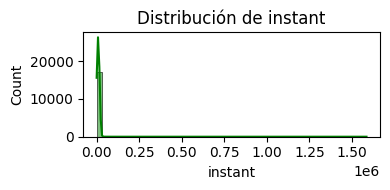

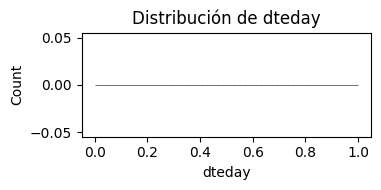

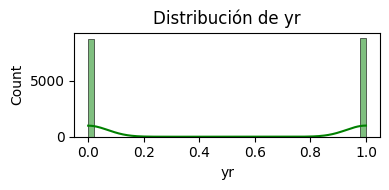

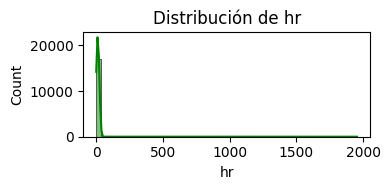

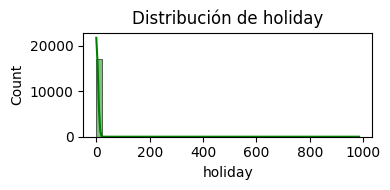

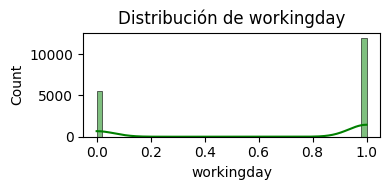

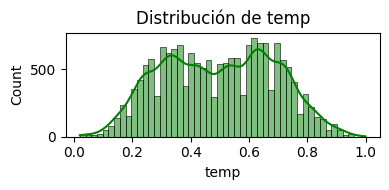

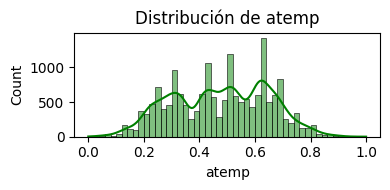

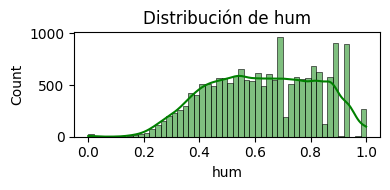

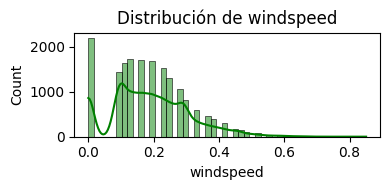

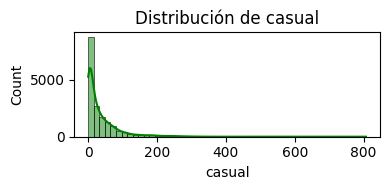

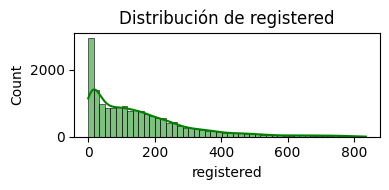

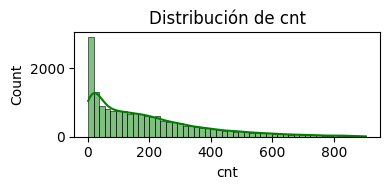

In [10]:
histo = df.select_dtypes(include=['number']).columns
for col in histo:
    plt.figure(figsize=(4, 2))
    sns.histplot(df[col], kde=True, bins=50, color='green')
    plt.title(f'Distribución de {col}')
    plt.tight_layout()
    plt.show()

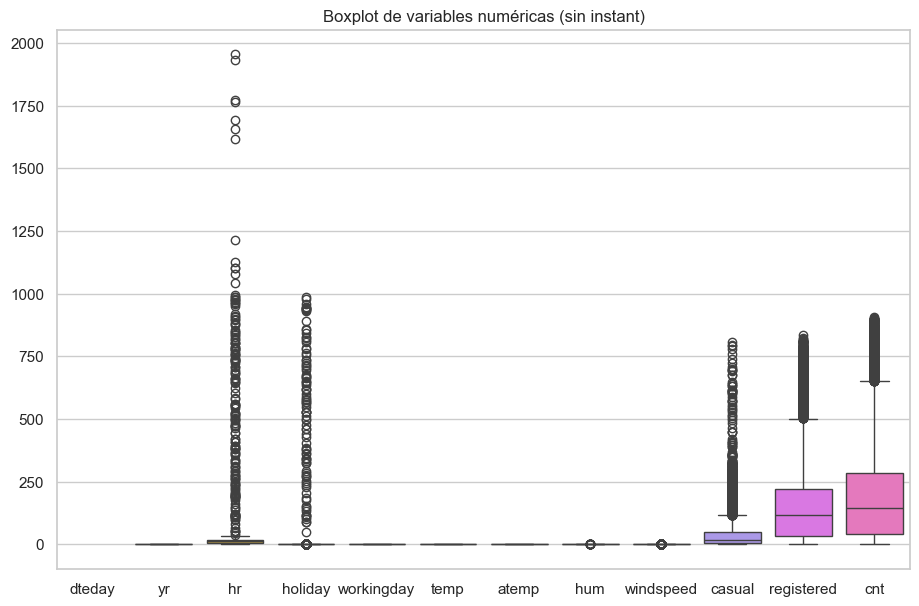

In [19]:
plt.figure(figsize=(11, 7))
sns.boxplot(data=df.select_dtypes(include='number').drop(columns=['instant']))
plt.title('Boxplot de variables numéricas (sin instant)')
plt.show()

In [12]:
# 1) Solo columnas numéricas
num = df.select_dtypes(include=[np.number])

# 2) Cuartiles e IQR por columna
Q1 = num.quantile(0.25)
Q3 = num.quantile(0.75)
IQR = Q3 - Q1

# 3) Límites por columna (mismas columnas que 'num')
low  = Q1 - 1.5 * IQR
high = Q3 + 1.5 * IQR

# 4) Máscara de outliers alineando por columnas (axis=1)
out_low  = num.lt(low,  axis=1)
out_high = num.gt(high, axis=1)
out_mask = out_low | out_high

# 5) Resúmenes
outliers_por_col = out_mask.sum().sort_values(ascending=False)
filas_con_outlier = out_mask.any(axis=1).sum()
pct_filas = filas_con_outlier / len(df) * 100

print('Outliers por columna:\n', outliers_por_col[outliers_por_col>0])
print(f'\nFilas con ≥1 outlier: {filas_con_outlier} ({pct_filas:.2f}%)')

# 6) Si quieres un DF sin outliers (solo filtrado por numéricas)
df_sin_outliers = df.loc[~out_mask.any(axis=1)].copy()
print('Shape sin outliers:', df_sin_outliers.shape)

Outliers por columna:
 casual        1244
registered     703
holiday        597
cnt            525
windspeed      345
hr             169
instant         73
hum             24
dtype: Int64

Filas con ≥1 outlier: 2950 (16.82%)
Shape sin outliers: (14584, 17)


In [14]:
# Usar 'cat_cols' ya definido
# Calcular la moda de forma segura para cada columna
moda = {}
for col in cat_cols:
    mode_vals = df[col].mode()
    moda[col] = mode_vals.iloc[0] if not mode_vals.empty else None
moda = pd.Series(moda)

carnal = df[cat_cols].nunique()
recuentos = {}
for col in cat_cols:
    vc = df[col].value_counts()
    recuentos[col] = vc.iloc[0] if not vc.empty else 0

print("Moda")
print(moda)
print("\nCarnalidad")
print(carnal)
for col, count in recuentos.items():
    print(f"Recuentos de {col}: {count}")

Moda
season         3
mnth          12
weekday        5
weathersit     1
dtype: int64

Carnalidad
season         4
mnth          12
weekday        7
weathersit     4
dtype: int64
Recuentos de season: 4529
Recuentos de mnth: 1510
Recuentos de weekday: 2534
Recuentos de weathersit: 11224


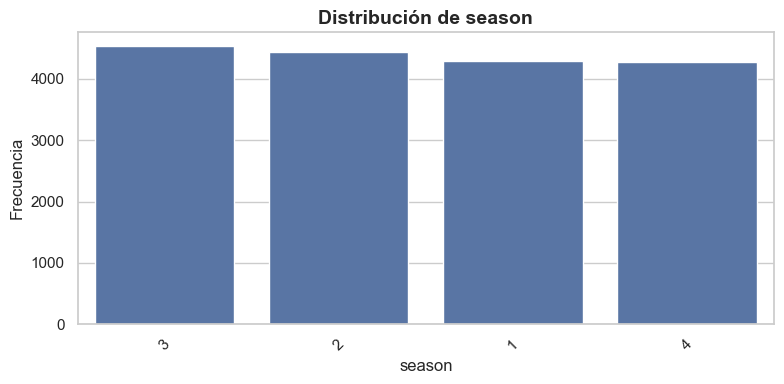

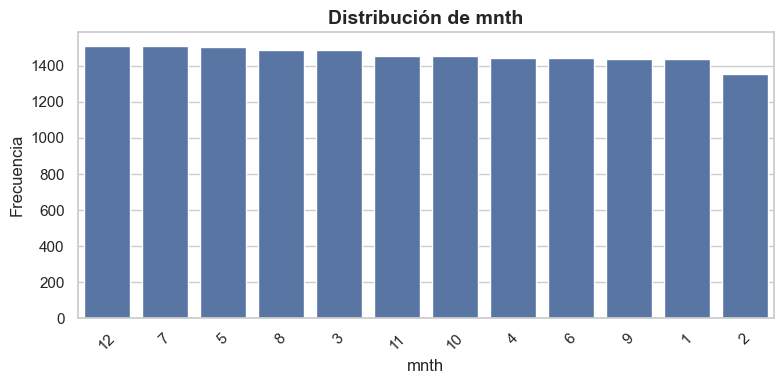

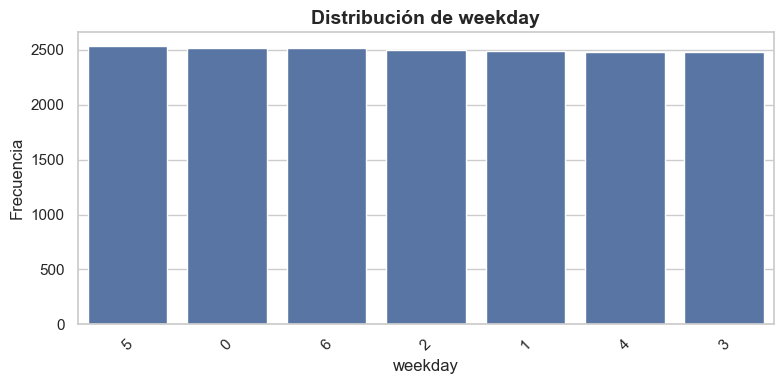

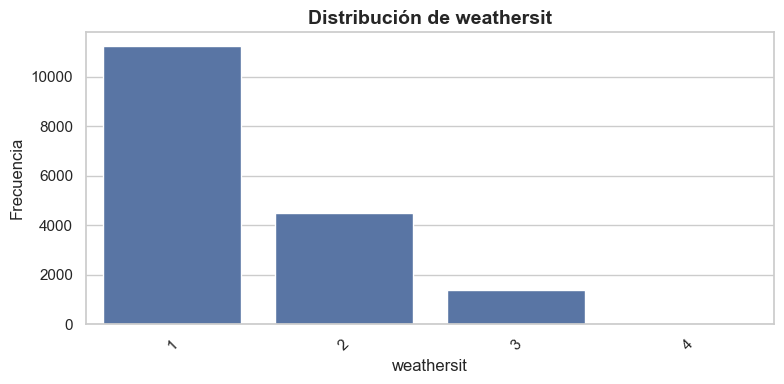

In [15]:
sns.set(style="whitegrid", palette="deep")

for col in cat_cols:
    plt.figure(figsize=(8, 4))
    ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Distribución de {col}", fontsize=14, weight='bold')
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

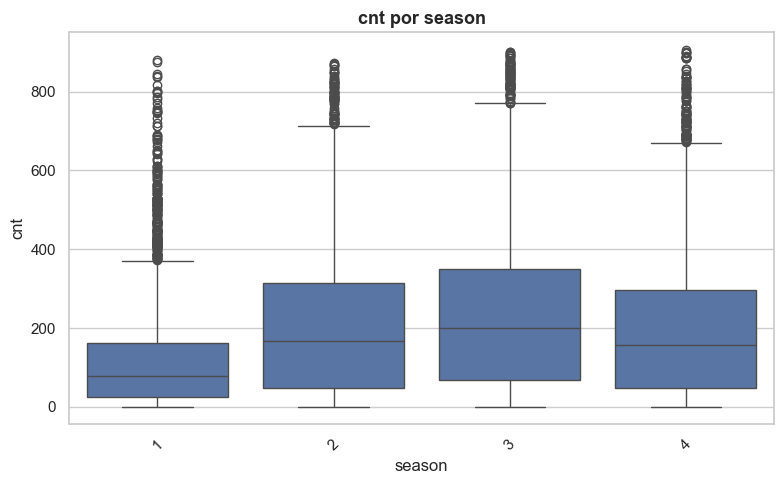

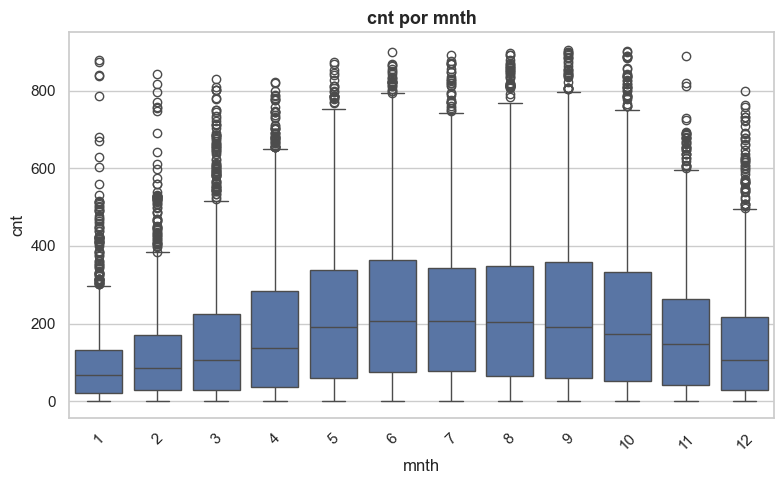

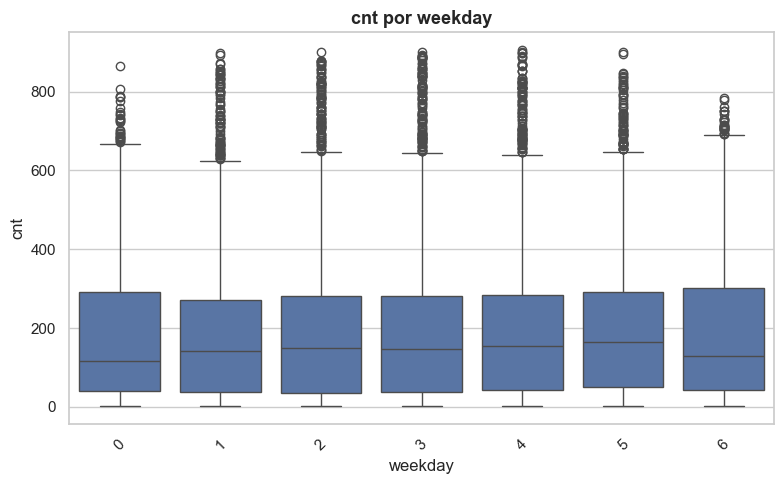

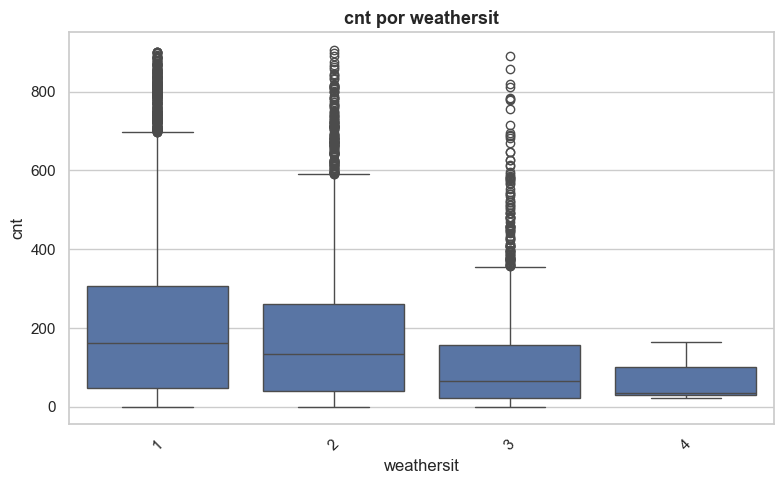

In [16]:
cat_cols = df.select_dtypes(include=['category', 'object']).columns
target = 'cnt'  # variable numérica a analizar

for col in cat_cols:
    plt.figure(figsize=(8,5))
    sns.boxplot(data=df, x=col, y=target)
    plt.title(f'{target} por {col}', fontsize=13, weight='bold')
    plt.xlabel(col)
    plt.ylabel(target)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()